Classification des Fleurs d’Iris

Objectifs du TP:

-Apprendre à créer un workflow de recherche reproductible: en utilisant Git pour le versionnement et GitHub pour la collaboration.
  
-Utiliser Jupyter Notebook: pour combiner code, texte et visualisations dans un document unique et explicatif. 

-Maîtriser des bibliothèques Python: comme NumPy (calcul numérique) et Pandas (manipulation de données) pour documenter une analyse de données étape par étape. 

## Description du jeu de données Iris

Le jeu de données **Iris** est un jeu classique utilisé en apprentissage automatique.  
Il contient **150 échantillons** de fleurs appartenant à trois espèces :

- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Chaque fleur est décrite par **quatre caractéristiques** :

- Longueur du sépale (cm)
- Largeur du sépale (cm)
- Longueur du pétale (cm)
- Largeur du pétale (cm)
 pétale (cm)

# Importation des bibliothèques principales

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Vérification rapide des versions

In [5]:
print("NumPy :", np.__version__)
print("Pandas :", pd.__version__)

NumPy : 1.26.4
Pandas : 2.2.2


# Chargement du jeu de données Iris depuis scikit-learn



In [6]:
iris = load_iris()

# Création d’un DataFrame Pandas

In [7]:
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Ajout d’une colonne pour les espèces

In [8]:
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Affichage des 5 premières lignes

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Analyse exploratoire et visualisation des données (EDA)

Dimensions du jeu de données : (150, 5)

Aperçu rapide :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Statistiques descriptives :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Répartition des espèces :
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


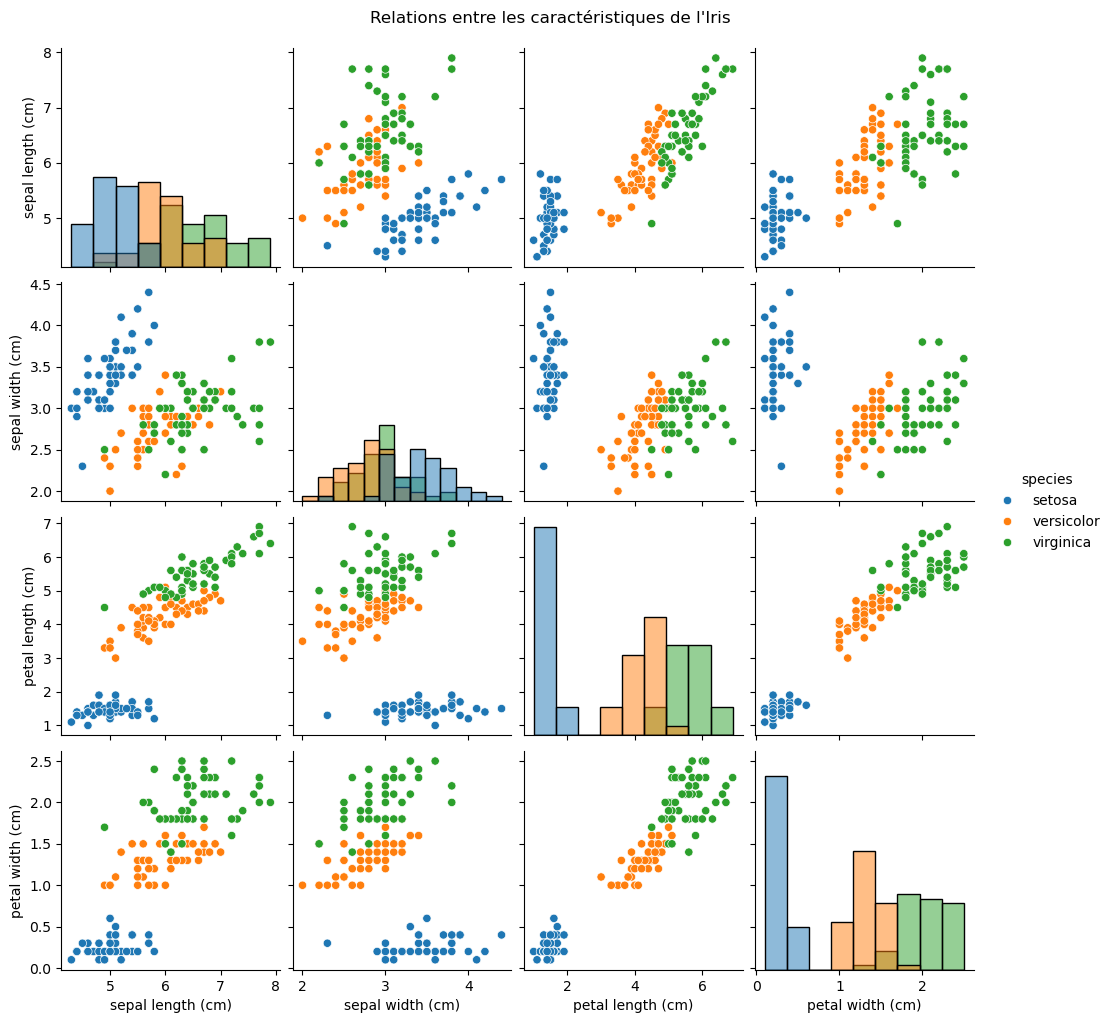

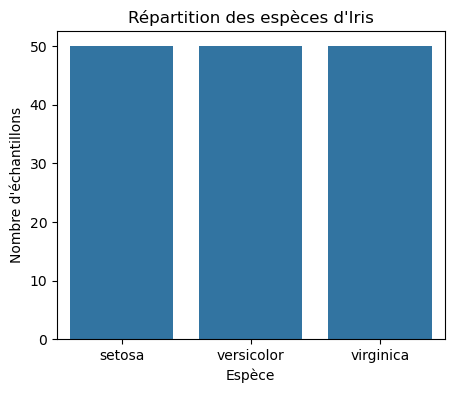

In [22]:
# Taille et aperçu des données
print("Dimensions du jeu de données :", data.shape)
print("\nAperçu rapide :")
display(data.head())

# Statistiques descriptives
print("\nStatistiques descriptives :")
display(data.describe())

# Répartition des espèces
print("\nRépartition des espèces :")
print(data["species"].value_counts())

# Visualisation : pairplot (relations entre variables)
sns.pairplot(data, hue='species', diag_kind='hist')
plt.suptitle("Relations entre les caractéristiques de l'Iris", y=1.02)
plt.show()

# Visualisation : distribution par espèce
plt.figure(figsize=(5,4))
sns.countplot(x="species", data=data)
plt.title("Répartition des espèces d'Iris")
plt.xlabel("Espèce")
plt.ylabel("Nombre d'échantillons")
plt.show()

Préparation des données pour le modèle KNN

In [23]:
# 1️⃣ Séparation des variables (X : caractéristiques, y : étiquettes)
X = data.iloc[:, :-1]   # toutes les colonnes sauf la dernière
y = data.iloc[:, -1]    # dernière colonne : 'species'

print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

# 2️⃣ Division du jeu de données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTaille des ensembles :")
print("Train :", X_train.shape[0], "échantillons")
print("Test  :", X_test.shape[0], "échantillons")

# 3️⃣ Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nExemple de données standardisées (train) :")
print(X_train_scaled[:5])

Dimensions de X : (150, 4)
Dimensions de y : (150,)

Taille des ensembles :
Train : 120 échantillons
Test  : 30 échantillons

Exemple de données standardisées (train) :
[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]


Entraînement et évaluation du modèle KNN

✅ Précision du modèle KNN : 93.33%


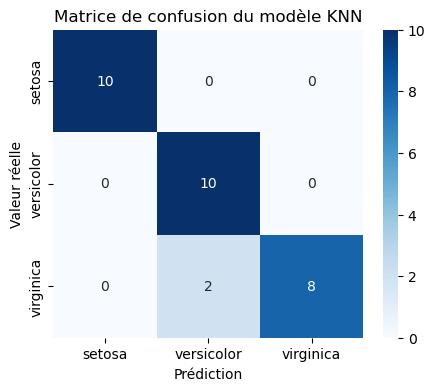


Rapport de classification :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [24]:
# 1️⃣ Création du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# 2️⃣ Entraînement du modèle
knn.fit(X_train_scaled, y_train)

# 3️⃣ Prédictions sur les données de test
y_pred = knn.predict(X_test_scaled)

# 4️⃣ Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Précision du modèle KNN : {accuracy*100:.2f}%")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matrice de confusion du modèle KNN")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

# Rapport de classification
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))